# Task
Dari data csv (output big query) tersebut, analisislah perbandingan laba rugi setelah pajak setiap tahun (dari tahun 2020 hingga 2026) skenario normal, skenario tax holiday, skenario garis lurus, dan skenario saldo menurun. urutkan dari tahun 2020 hingga 2026. visualisasikan dengan diagram batang yang colorful, namun tetap enak dilihat.

Here is all the data you need:
"Perbandingan_Laba_Setelah_Pajak_Setiap_Skenario.csv"

## Data loading

### Subtask:
Load the data from "Perbandingan_Laba_Setelah_Pajak_Setiap_Skenario.csv" into a dataframe.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the head and info.



In [1]:
import pandas as pd

df = pd.read_csv("Perbandingan_Laba_Setelah_Pajak_Setiap_Skenario.csv")
display(df.head())
display(df.info())

,tahun,pendapatan,beban_operasional,penyusutan_normal,skenario_normal,tax_rate_normal,laba_bersih_sebelum_pajak_normal,pph_badan_normal,laba_bersih_setelah_pajak_normal,arus_kas_normal,...,pph_badan_garis_lurus,laba_bersih_setelah_pajak_garis_lurus,arus_kas_garis_lurus,metode_saldo_menurun,penyusutan_saldo_menurun,tax_rate_saldo_menurun,laba_bersih_sebelum_pajak_saldo_menurun,pph_badan_saldo_menurun,laba_bersih_setelah_pajak_saldo_menurun,arus_kas_saldo_menurun
0,2020,1000000000,600000000,50000000,Normal,0.25,350000000,87500000,262500000,312500000,...,87500000,262500000,312500000,Saldo Menurun,100000000,0.25,300000000,75000000,225000000,325000000
1,2021,1200000000,700000000,55000000,Normal,0.22,445000000,97900000,347100000,402100000,...,97900000,347100000,402100000,Saldo Menurun,110000000,0.22,390000000,85800000,304200000,414200000
2,2022,1500000000,800000000,60000000,Normal,0.22,640000000,140800000,499200000,559200000,...,140800000,499200000,559200000,Saldo Menurun,120000000,0.22,580000000,127600000,452400000,572400000
3,2023,1400000000,750000000,58000000,Normal,0.20,592000000,118400000,473600000,531600000,...,118400000,473600000,531600000,Saldo Menurun,116000000,0.20,534000000,106800000,427200000,543200000
4,2024,1600000000,820000000,62000000,Normal,0.20,718000000,143600000,574400000,636400000,...,143600000,574400000,636400000,Saldo Menurun,124000000,0.20,656000000,131200000,524800000,648800000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tahun                                    7 non-null      int64  
 1   pendapatan                               7 non-null      int64  
 2   beban_operasional                        7 non-null      int64  
 3   penyusutan_normal                        7 non-null      int64  
 4   skenario_normal                          7 non-null      object 
 5   tax_rate_normal                          7 non-null      float64
 6   laba_bersih_sebelum_pajak_normal         7 non-null      int64  
 7   pph_badan_normal                         7 non-null      int64  
 8   laba_bersih_setelah_pajak_normal         7 non-null      int64  
 9   arus_kas_normal                          7 non-null      int64  
 10  skenario_tax_holiday                     7 non-null   

None

## Data wrangling

### Subtask:
Ensure the data is in the correct format, with columns for Year, Normal Scenario, Tax Holiday Scenario, Straight Line Scenario, and Declining Balance Scenario. Ensure the Year column is treated as a categorical variable or indexed appropriately for time series representation. Sort the data by year from 2020 to 2026.


**Reasoning**:
Select, rename, and sort the relevant columns as specified in the instructions.



In [2]:
df_processed = df[[
    'tahun',
    'laba_bersih_setelah_pajak_normal',
    'laba_bersih_setelah_pajak_tax_holiday',
    'laba_bersih_setelah_pajak_garis_lurus',
    'laba_bersih_setelah_pajak_saldo_menurun'
]].copy()

df_processed.rename(columns={
    'tahun': 'Year',
    'laba_bersih_setelah_pajak_normal': 'Normal Scenario',
    'laba_bersih_setelah_pajak_tax_holiday': 'Tax Holiday Scenario',
    'laba_bersih_setelah_pajak_garis_lurus': 'Straight Line Scenario',
    'laba_bersih_setelah_pajak_saldo_menurun': 'Declining Balance Scenario'
}, inplace=True)

df_processed['Year'] = df_processed['Year'].astype(int)

df_processed.sort_values(by='Year', ascending=True, inplace=True)

display(df_processed.head())
display(df_processed.info())

,Year,Normal Scenario,Tax Holiday Scenario,Straight Line Scenario,Declining Balance Scenario
0,2020,262500000,350000000,262500000,225000000
1,2021,347100000,445000000,347100000,304200000
2,2022,499200000,640000000,499200000,452400000
3,2023,473600000,592000000,473600000,427200000
4,2024,574400000,718000000,574400000,524800000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Year                        7 non-null      int64
 1   Normal Scenario             7 non-null      int64
 2   Tax Holiday Scenario        7 non-null      int64
 3   Straight Line Scenario      7 non-null      int64
 4   Declining Balance Scenario  7 non-null      int64
dtypes: int64(5)
memory usage: 412.0 bytes


None

## Data visualization

### Subtask:
Create a colorful bar chart comparing the profit after tax for each scenario across the years 2020 to 2026. Ensure the chart is visually appealing and easy to interpret.


**Reasoning**:
Melt the dataframe to a long format suitable for plotting with seaborn, then create a bar plot to visualize the comparison of profit after tax across different scenarios and years, ensuring the plot is visually appealing and easy to interpret.



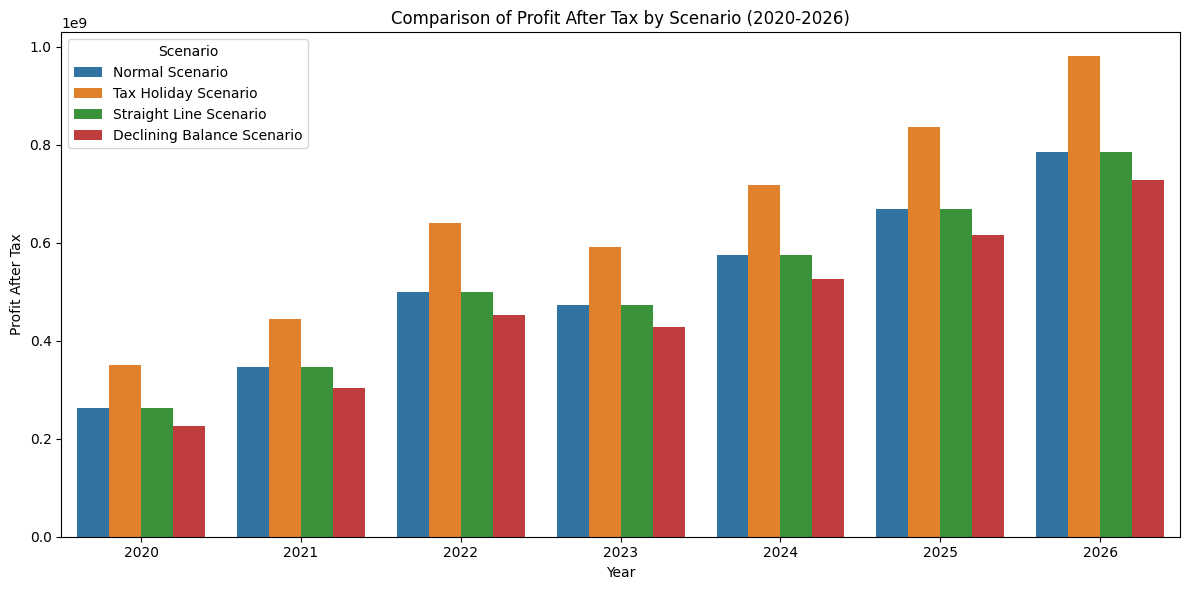

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df_melted = pd.melt(df_processed,
                    id_vars=['Year'],
                    value_vars=['Normal Scenario', 'Tax Holiday Scenario', 'Straight Line Scenario', 'Declining Balance Scenario'],
                    var_name='Scenario',
                    value_name='Profit After Tax')

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Profit After Tax', hue='Scenario', data=df_melted)
plt.title("Comparison of Profit After Tax by Scenario (2020-2026)")
plt.xlabel("Year")
plt.ylabel("Profit After Tax")
plt.xticks(rotation=0)
plt.legend(title='Scenario')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis successfully compared the profit after tax for four different scenarios: Normal, Tax Holiday, Straight Line Depreciation, and Declining Balance Depreciation, for the years 2020 to 2026.
*   The data was prepared by selecting relevant columns, renaming them for clarity, and ensuring it was sorted by year.
*   A colorful bar chart was generated to visualize the profit after tax comparison across the years for each scenario, providing a clear visual representation of the financial impact of each scenario.

### Insights or Next Steps

*   The visualization clearly shows the difference in profit after tax across scenarios, highlighting the potential benefits of the Tax Holiday scenario and the impact of different depreciation methods.
*   Further analysis could involve calculating the cumulative profit over the period for each scenario or performing a more detailed breakdown of the factors contributing to the differences in profit after tax.
